In [42]:
path = '';

%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import math
import random
lm = linear_model.LinearRegression()

In [255]:
df=pd.read_csv('housingdata.csv', sep=',',header=0)
col_name = df.columns
col_name

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
6 0


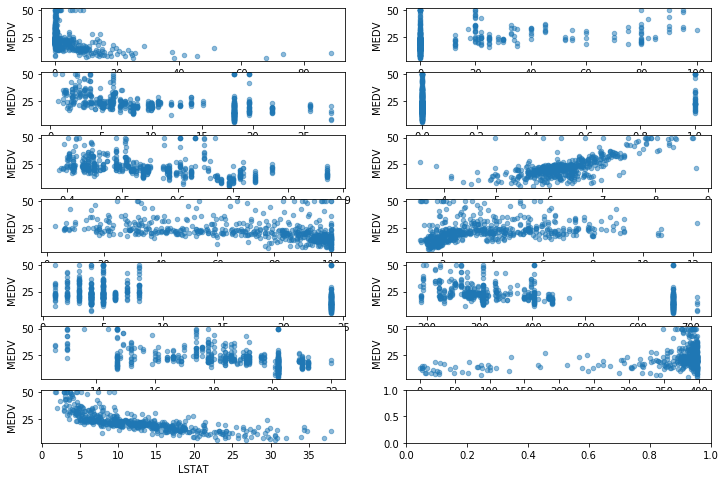

In [45]:
fig, axarr = plt.subplots(7, 2, figsize=(12, 8))
j = 0
k = 0
for i in range(0, 13):
    print(j,k)
    df.plot.scatter(x = col_name[i], y = 'MEDV', ax = axarr[j][k],  alpha=0.5)

#     plt.title('Scatter plot with polynomial line')
#     plt.xlabel(col_name[i])
#     plt.ylabel(col_name[13])
#     plt.ylim(0, df['MEDV'].max()+5)
#     # plt.xlim(-5,20)
#     plt.show()
    
    if k>=1:
        k = 0 
        j = j+1
    else:
        k = k+1
# show()

In [160]:
## (b)

In [200]:
import itertools 
from itertools import combinations, chain 

train_df = df.iloc[0:400,]
test_df = df.iloc[400:df.shape[0],]
  
def findsubsets(s, n): 
    return list(map(set, itertools.combinations(s, n))) 
  
# Driver Code 
var = ['AGE', 'INDUS', 'NOX', 'RM', 'TAX']

subs = []
for i in range(0, 6):
    if i>0:
        subset = findsubsets(var, i)
    for j in range(0, np.size(subset)):
        if i==0:
            fit1 = np.polyfit(train_df['AGE'], train_df['MEDV'], i)
            tr_predic = np.polyval(fit1, train_df['AGE'])
            ts_predic = np.polyval(fit1, test_df['AGE'])
            subs.append([i, "intercept", np.mean((train_df['MEDV'] - tr_predic)**2), 
                     np.mean((test_df['MEDV']- ts_predic)**2)])
        else:
            fit1 = lm.fit(train_df[list(subset[j])], train_df['MEDV'])
            tr_predic = fit1.predict(train_df[list(subset[j])])
            ts_predic = fit1.predict(test_df[list(subset[j])])
            subs.append([i, '_'.join(subset[j]), np.mean((train_df['MEDV'] - tr_predic)**2), 
                         np.mean((test_df['MEDV']- ts_predic)**2)])

subs = pd.DataFrame(subs, columns = ['i', 'var', 'tr_mse', 'ts_mse'])
subs

# print("Minimum traing data error is for the subset " +subs[np.argmin(subs_mse_tr)][1]+" with traing MSE %.3f" %np.min(subs_mse_tr))
# print("Minimum test data error is for the subset " +subs[np.argmin(subs_mse_ts)][1]+" with test MSE %.3f" %np.min(subs_mse_ts))

,i,var,tr_mse,ts_mse
0,0,intercept,83.807010,102.226586
1,1,AGE,77.322939,68.063353
2,1,INDUS,72.089246,43.833690
3,1,NOX,76.094591,54.926077
4,1,RM,36.303311,79.625831
5,1,TAX,75.693727,31.616309
6,2,AGE_INDUS,71.752927,42.589235
7,2,AGE_NOX,75.448504,54.014517
8,2,RM_AGE,35.381011,67.970034
9,2,TAX_AGE,73.592627,30.206715


## (c)

### i.

In [189]:
min_sub = []
for i in range(0, 6):
    subs_sub = subs[subs['i']==i]
    min_sub.append(list(subs_sub.loc[np.argmin(subs_sub['ts_mse'])]))
min_sub = pd.DataFrame(min_sub , columns = ['i', 'var', 'train_mse', 'test_mse'])
min_sub

,i,var,train_mse,test_mse
0,0,intercept,83.807010,102.226586
1,1,TAX,75.693727,31.616309
2,2,TAX_AGE,73.592627,30.206715
3,3,TAX_AGE_NOX,73.332583,30.001960
4,4,TAX_AGE_NOX_INDUS,70.781298,31.431449
5,5,RM_AGE_NOX_INDUS_TAX,35.110129,57.668802


### ii.

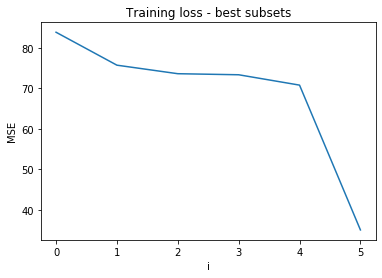

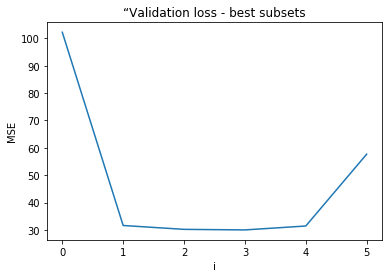

In [188]:
plt.plot(min_sub['i'], min_sub['train_mse'])
plt.title('Training loss - best subsets')
plt.xlabel('i')
plt.ylabel('MSE')
plt.show()

plt.plot(min_sub['i'], min_sub['test_mse'])
plt.title('“Validation loss - best subsets')
plt.xlabel('i')
plt.ylabel('MSE')
plt.show()


### iii.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


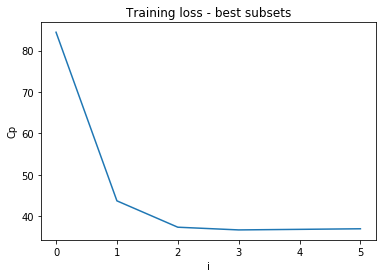

,i,var,train_mse,cp
0,0,intercept,84.419556,84.419556
1,1,RM,43.600552,43.743984
2,2,RM_TAX,37.096997,37.383861
3,3,RM_AGE_TAX,36.299720,36.730015
4,4,RM_AGE_TAX_INDUS,36.291805,36.865532
5,5,RM_AGE_NOX_INDUS_TAX,36.288264,37.005423


In [199]:
var = ['AGE', 'INDUS', 'NOX', 'RM', 'TAX']

subs_all = []
for i in range(0, 6):
    if i>0:
        subset = findsubsets(var, i)
    for j in range(0, np.size(subset)):
        if i==0:
            fit1 = np.polyfit(df['AGE'], df['MEDV'], i)
            tr_predic = np.polyval(fit1, df['AGE'])
            subs_all.append([i, "intercept", np.mean((df['MEDV'] - tr_predic)**2)])
        else:
            fit1 = lm.fit(df[list(subset[j])], df['MEDV'])
            tr_predic = fit1.predict(df[list(subset[j])])
            subs_all.append([i, '_'.join(subset[j]), np.mean((df['MEDV'] - tr_predic)**2)])

subs_all = pd.DataFrame(subs_all, columns = ['i', 'var', 'tr_mse'])


subs_all['cp'] = subs_all['tr_mse'] + 2*subs_all.iloc[len(subs_all)-1,2]/len(df)*subs_all['i']
min_sub_cp_all = []
for i in range(0, 6):
    subs_sub_all = subs_all[subs_all['i']==i]
    min_sub_cp_all.append(list(subs_sub_all.loc[np.argmin(subs_sub_all['cp'])]))
    
min_sub_cp_all = pd.DataFrame(min_sub_cp_all , columns = ['i', 'var', 'train_mse', 'cp'])

plt.plot(min_sub_cp_all['i'], min_sub_cp_all['cp'])
plt.title('Training loss - best subsets')
plt.xlabel('i')
plt.ylabel('Cp')
plt.show()
min_sub_cp_all

### iv.

In [328]:
import itertools 
from itertools import combinations, chain 

# var = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
#        'PTRATIO', 'B', 'LSTAT']

var = ['AGE', 'INDUS', 'NOX', 'RM', 'TAX']

train_df = df.iloc[0:400,]
test_df = df.iloc[400:df.shape[0],]

lam = 0
subs_rid = []

reg = linear_model.Ridge(alpha=lam)
reg.fit(train_df[var], train_df['MEDV'])
sum_2coef = np.sum((reg.coef_)**2)
tr_predic = reg.predict(train_df[var])
ts_predic = reg.predict(test_df[var])
tr_mse = np.mean((train_df['MEDV'] - tr_predic)**2)
ts_mse = np.mean((test_df['MEDV'] - ts_predic)**2)
tr_comx0 = tr_mse + lam*sum_2coef
ts_comx0 = ts_mse + lam*sum_2coef
subs_rid.append([lam, tr_mse, ts_mse, tr_comx0, ts_comx0])
loop = True
    
# while loop:
for i in range(0, 1000):
    lam = lam + 5000
    reg = linear_model.Ridge(alpha=lam)
    reg.fit(train_df[var], train_df['MEDV'])
    sum_2coef = np.sum((reg.coef_)**2)
    tr_predic = reg.predict(train_df[var])
    ts_predic = reg.predict(test_df[var])
    tr_mse = np.mean((train_df['MEDV'] - tr_predic)**2)
    ts_mse = np.mean((test_df['MEDV'] - ts_predic)**2)
    tr_comx = tr_mse + lam*sum_2coef
    ts_comx = ts_mse + lam*sum_2coef
    subs_rid.append([lam, tr_mse, ts_mse, tr_comx, ts_comx])
#     if ts_comx < ts_comx0 and lam <1e12:
#         loop = True
#     else:
#         loop = False

subs_rid = pd.DataFrame(subs_rid, columns=['lambda', 'train_mse', 'test_mse', 'train_model_complx', 'test_model_complx'])
print(reg.coef_, subs_rid)
# print(np.dot(df.loc[0][0:13], reg.coef_)+reg.intercept_, tr_predic[0])


[-4.01489537e-03 -1.25018062e-03 -1.56308092e-05  3.73787669e-04
 -1.23731290e-02]        lambda  train_mse   test_mse  train_model_complx  test_model_complx
0           0  35.110129  57.668802           35.110129          57.668802
1        5000  68.713098  30.531767          817.880551         779.699221
2       10000  70.320171  30.421548          622.722726         582.824103
3       15000  71.048411  30.391179          538.344898         497.687666
4       20000  71.493094  30.388491          487.827902         446.723299
...       ...        ...        ...                 ...                ...
996   4980000  76.817322  50.671145          931.086284         904.940107
997   4985000  76.819268  50.687042          931.167411         905.035185
998   4990000  76.821212  50.702931          931.248104         905.129823
999   4995000  76.823156  50.718811          931.328365         905.224020
1000  5000000  76.825098  50.734683          931.408195         905.317779

[1001 rows x 5 c

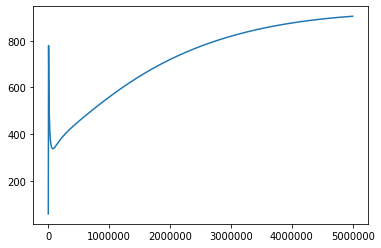

In [329]:
plt.plot(subs_rid['lambda'], subs_rid['test_model_complx'])
plt.show()

In [289]:
df.loc[0][0:13]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [323]:
train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12,13.1
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37,12.5
397,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666,20.2,393.10,19.92,8.5
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0


In [325]:
test_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32,7.2
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
